# DNCNN

Total 8498 Training Dataset
Total 2857 Validation Dataset

Start Epoch    1/300
Epoch    1 Loss 0.067465Epoch    1 Val PSNR: 21.17264747619629
New Best PSNR: 21.17264747619629
Epoch    1 Time: 67.83270621299744

Start Epoch    2/300
Epoch    2 Loss 0.048004Epoch    2 Val PSNR: 23.44036293029785
New Best PSNR: 23.44036293029785
Epoch    2 Time: 65.49788355827332

Start Epoch    3/300
Epoch    3 Loss 0.044081Epoch    3 Val PSNR: 24.237369537353516
New Best PSNR: 24.237369537353516
Epoch    3 Time: 66.25822615623474

Start Epoch    4/300
Epoch    4 Loss 0.040665Epoch    4 Val PSNR: 24.774471282958984
New Best PSNR: 24.774471282958984
Epoch    4 Time: 65.45514869689941

Start Epoch    5/300
Epoch    5 Loss 0.037703Epoch    5 Val PSNR: 24.94995880126953
New Best PSNR: 24.94995880126953
Epoch    5 Time: 65.60154628753662

Start Epoch    6/300
Epoch    6 Loss 0.037290Epoch    6 Val PSNR: 25.361345291137695
New Best PSNR: 25.361345291137695
Epoch    6 Time: 65.87947821617126

Start Epoch    7/

Epoch  123 Loss 0.025746Epoch  123 Val PSNR: 27.381032943725586
New Best PSNR: 27.381032943725586
Epoch  123 Time: 70.03717231750488

Start Epoch  124/300
Epoch  124 Loss 0.026804Epoch  124 Val PSNR: 27.36347198486328
Epoch  124 Time: 67.82016372680664

Start Epoch  125/300
Epoch  125 Loss 0.027960Epoch  125 Val PSNR: 27.32836151123047
Epoch  125 Time: 67.29880976676941

Start Epoch  126/300
Epoch  126 Loss 0.028031Epoch  126 Val PSNR: 27.305517196655273
Epoch  126 Time: 68.23395872116089

Start Epoch  127/300
Epoch  127 Loss 0.025940Epoch  127 Val PSNR: 27.365570068359375
Epoch  127 Time: 68.49301958084106

Start Epoch  128/300
Epoch  128 Loss 0.029615Epoch  128 Val PSNR: 27.34392738342285
Epoch  128 Time: 67.10737371444702

Start Epoch  129/300
Epoch  129 Loss 0.025004Epoch  129 Val PSNR: 27.376907348632812
Epoch  129 Time: 67.79519319534302

Start Epoch  130/300
Epoch  130 Loss 0.029496Epoch  130 Val PSNR: 27.364700317382812
Epoch  130 Time: 68.74997639656067

Start Epoch  131/300
E

Epoch  190 Loss 0.024625Epoch  190 Val PSNR: 27.40668296813965
Epoch  190 Time: 66.26331758499146

Start Epoch  191/300
Epoch  191 Loss 0.029080Epoch  191 Val PSNR: 27.34624481201172
Epoch  191 Time: 67.27555346488953

Start Epoch  192/300
Epoch  192 Loss 0.026761Epoch  192 Val PSNR: 27.421194076538086
Epoch  192 Time: 66.50226926803589

Start Epoch  193/300
Epoch  193 Loss 0.028086Epoch  193 Val PSNR: 27.40909767150879
Epoch  193 Time: 68.28733515739441

Start Epoch  194/300
Epoch  194 Loss 0.028020Epoch  194 Val PSNR: 27.413639068603516
Epoch  194 Time: 66.67759418487549

Start Epoch  195/300
Epoch  195 Loss 0.025266Epoch  195 Val PSNR: 27.393075942993164
Epoch  195 Time: 68.23817038536072

Start Epoch  196/300
Epoch  196 Loss 0.031210Epoch  196 Val PSNR: 27.389318466186523
Epoch  196 Time: 70.14913630485535

Start Epoch  197/300
Epoch  197 Loss 0.027884Epoch  197 Val PSNR: 27.42534637451172
New Best PSNR: 27.42534637451172
Epoch  197 Time: 69.46702122688293

Start Epoch  198/300
Epo

Epoch  256 Loss 0.026839Epoch  256 Val PSNR: 27.43303871154785
Epoch  256 Time: 66.19755339622498

Start Epoch  257/300
Epoch  257 Loss 0.026659Epoch  257 Val PSNR: 27.43048095703125
Epoch  257 Time: 65.72612142562866

Start Epoch  258/300
Epoch  258 Loss 0.026447Epoch  258 Val PSNR: 27.44056510925293
Epoch  258 Time: 66.34116172790527

Start Epoch  259/300
Epoch  259 Loss 0.022613Epoch  259 Val PSNR: 27.388935089111328
Epoch  259 Time: 66.28497958183289

Start Epoch  260/300
Epoch  260 Loss 0.028267Epoch  260 Val PSNR: 27.41971778869629
Epoch  260 Time: 66.11585807800293

Start Epoch  261/300
Epoch  261 Loss 0.025499Epoch  261 Val PSNR: 27.450292587280273
Epoch  261 Time: 65.68716359138489

Start Epoch  262/300
Epoch  262 Loss 0.025221Epoch  262 Val PSNR: 27.461076736450195
New Best PSNR: 27.461076736450195
Epoch  262 Time: 66.20104050636292

Start Epoch  263/300
Epoch  263 Loss 0.026732Epoch  263 Val PSNR: 27.43783950805664
Epoch  263 Time: 66.66407370567322

Start Epoch  264/300
Epo

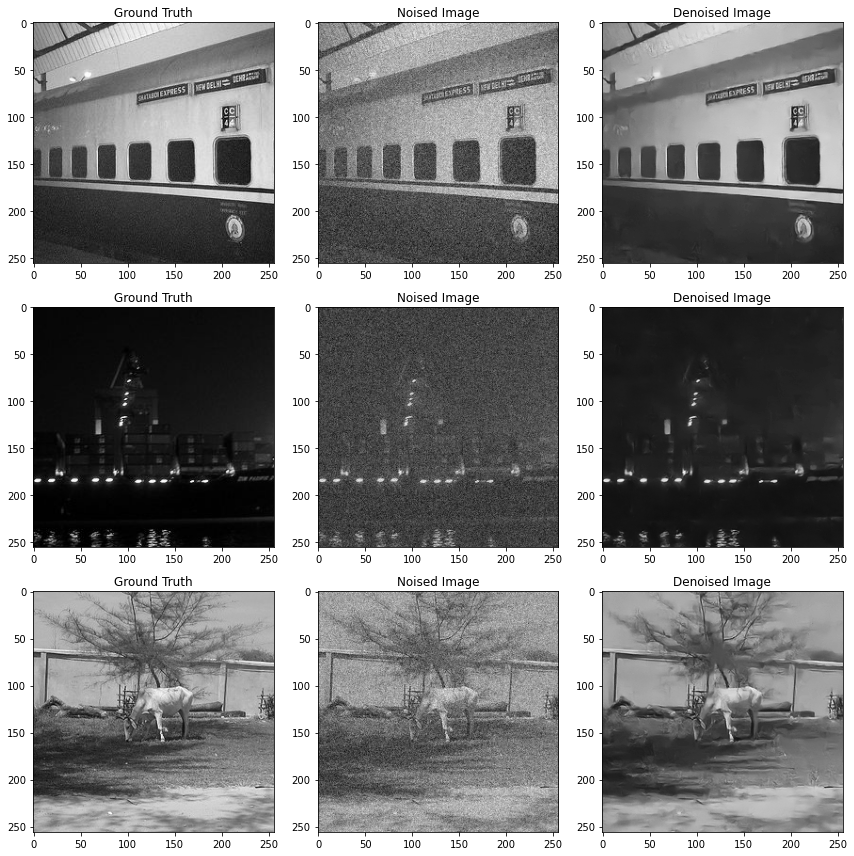

In [1]:
import torch.nn as nn
import torch
import os
import shutil
from torchvision.datasets.vision import VisionDataset
from PIL import Image
from torchvision.datasets.utils import download_url, verify_str_arg, download_and_extract_archive
import torchvision.transforms as T
from torchvision.transforms import functional as TF
from torch.utils.data import DataLoader
import random
import time
import matplotlib.pyplot as plt


###################################
# STEP 1: Implement Denoising CNN #
###################################
class DnCNN(nn.Module):
    def __init__(self, in_channels, out_channels, channels=64, depth=17):
        super(DnCNN, self).__init__()

        self.head = nn.Sequential(
            nn.Conv2d(in_channels, channels, kernel_size=3, stride=1, padding=1, bias=True),
            nn.ReLU(inplace=True)
        )

        self.body = []
        for i in range(depth - 2):
            self.body.append(nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1, bias=True))
            self.body.append(nn.BatchNorm2d(channels, momentum=0.9, eps=1e-04, affine=True))
            self.body.append(nn.ReLU(inplace=True))
        self.body = nn.ModuleList(self.body)

        self.tail = nn.Conv2d(channels, out_channels, kernel_size=3, stride=1, padding=1, bias=True)

        self._initialize_weights()

    def forward(self, x):
        n = self.head(x)
        for i in range(len(self.body)):
            n = self.body[i](n)
        n = self.tail(n)
        return x - n

    def _initialize_weights(self):
            for m in self.modules():
                if isinstance(m, nn.Conv2d):
                    torch.nn.init.orthogonal_(m.weight)
                    if m.bias is not None:
                        m.bias.data.zero_()
                elif isinstance(m, nn.BatchNorm2d):
                    nn.init.uniform_(m.weight.data, 0.1, 1.0)
                    nn.init.constant_(m.bias.data, 0.0)


###################################################################
# STEP 2: Create DataLoader using Modified version of VOC Dataset #
###################################################################
class VOCDataset(VisionDataset):
    url = "https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/semantic_contours/benchmark.tgz"
    md5 = "82b4d87ceb2ed10f6038a1cba92111cb"
    filename = "benchmark.tgz"

    voc_train_url = "http://home.bharathh.info/pubs/codes/SBD/train_noval.txt"
    voc_split_filename = "train_noval.txt"
    voc_split_md5 = "79bff800c5f0b1ec6b21080a3c066722"

    def __init__(self, root, image_set="train", download=False, transforms=None):
        try:
            from scipy.io import loadmat
            self._loadmat = loadmat
        except ImportError:
            raise RuntimeError("Scipy is not found. This dataset needs to have scipy installed: "
                               "pip install scipy")

        super(VOCDataset, self).__init__(root, transforms)
        self.image_set = verify_str_arg(image_set, "image_set", ("train", "val", "train_noval"))

        sbd_root = self.root
        image_dir = os.path.join(sbd_root, 'img')

        if download:
            download_and_extract_archive(self.url, self.root, filename=self.filename, md5=self.md5)
            extracted_ds_root = os.path.join(self.root, "benchmark_RELEASE", "dataset")
            for f in ["cls", "img", "inst", "train.txt", "val.txt"]:
                old_path = os.path.join(extracted_ds_root, f)
                shutil.move(old_path, sbd_root)
            download_url(self.voc_train_url, sbd_root, self.voc_split_filename,
                         self.voc_split_md5)

        if not os.path.isdir(sbd_root):
            raise RuntimeError('Dataset not found or corrupted.' +
                               ' You can use download=True to download it')

        split_f = os.path.join(sbd_root, image_set.rstrip('\n') + '.txt')

        with open(os.path.join(split_f), "r") as fh:
            file_names = [x.strip() for x in fh.readlines()]

        self.images = [os.path.join(image_dir, x + ".jpg") for x in file_names]

    def __getitem__(self, index):
        img = Image.open(self.images[index]).convert('RGB')

        if self.transforms is not None:
            img = self.transforms(img)

        return img

    def __len__(self):
        return len(self.images)


# Create a transform that adds an additive gaussian noise
class AdditiveWhiteGaussianNoise(object):
    def __init__(self, mean=0, min_sigma=0, max_sigma=55):
        assert min_sigma <= max_sigma
        self.mean = mean
        self.min_sigma = min_sigma
        self.max_sigma = max_sigma

    def __call__(self, img, clipping=False):
        sigma = random.uniform(self.min_sigma, self.max_sigma)
        sigma /= 255.0
        noise = torch.normal(mean=self.mean, std=sigma, size=img.size())
        noised_img = img + noise
        if clipping:
            noised_img[noised_img >= 1] = 1
            noised_img[noised_img <= 0] = 0
        return noised_img


# Create a transform that randomly rotates an image by a multiple of 90
class RandomRotate90(object):
    def __call__(self, x):
        angle = random.choice([0, 90, 180, 270])
        return TF.rotate(x, angle)


train_transform = T.Compose([T.Grayscale(),
                             T.RandomCrop(size=(40, 40)),
                             T.RandomHorizontalFlip(0.5),
                             T.RandomVerticalFlip(0.5),
                             RandomRotate90(),
                             T.ToTensor()])

val_transform = T.Compose([T.Grayscale(),
                           T.CenterCrop(size=(40, 40)),
                           T.ToTensor()])

try:
    voc_ds_train = VOCDataset(root='.', image_set='train', download=False, transforms=train_transform)
except:
    voc_ds_train = VOCDataset(root='.', image_set='train', download=True, transforms=train_transform)

voc_dl_train = DataLoader(voc_ds_train, batch_size=64, shuffle=True)

# Validation Data
try:
    voc_ds_val = VOCDataset(root='.', image_set='val', download=False, transforms=val_transform)
except:
    voc_ds_val = VOCDataset(root='.', image_set='val', download=True, transforms=val_transform)

voc_dl_val = DataLoader(voc_ds_val, batch_size=64)

print('Total {} Training Dataset'.format(len(voc_ds_train)))
print('Total {} Validation Dataset'.format(len(voc_ds_val)))


#%%

###########################
# STEP 3: Train the model #
###########################

# Define PSNR to evaluate the performance
class PSNR(object):
    @staticmethod
    def __call__(img1, img2):
        mse = torch.mean((img1 - img2) ** 2)
        return 20 * torch.log10(255.0 / torch.sqrt(mse))

#%%


model = DnCNN(in_channels=1, out_channels=1, depth=17)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)

criterion = torch.nn.L1Loss()

epochs = 300

best_psnr = 0
total_time = 0
for epoch in range(epochs):
    print(f"\nStart Epoch {epoch + 1:4d}/300")
    tick = time.time()
    model.train()
    for img in voc_dl_train:
        optimizer.zero_grad()
        noised_img = AdditiveWhiteGaussianNoise(min_sigma=25, max_sigma=25)(img)
        img = img.to(device)
        noised_img = noised_img.to(device)
        recon_img = model(noised_img)

        loss = criterion(img, recon_img)
        loss.backward()
        optimizer.step()

        print(f"\rEpoch {epoch + 1:4d} Loss {loss.item():.6f}", end='')

    model.eval()
    psnr = 0.0
    count = 0
    for img in voc_dl_val:
        with torch.no_grad():
            noised_img = AdditiveWhiteGaussianNoise(min_sigma=25, max_sigma=25)(img)
            img = img.to(device)
            noised_img = noised_img.to(device)
            recon_img = model(noised_img)
            img *= 255.0
            recon_img *= 255.0

            psnr += PSNR()(img, recon_img) * img.shape[0]
            count += img.shape[0]
    psnr /= count

    print(f"Epoch {epoch + 1:4d} Val PSNR: {psnr}")

    if psnr > best_psnr:
        best_psnr = psnr
        print(f"New Best PSNR: {best_psnr}")
        torch.save({
            "model_state_dict": model.state_dict()
        }, "model_random.pt")

    scheduler.step()

    tock = time.time()
    total_time += tock - tick
    print(f"Epoch {epoch + 1:4d} Time: {tock - tick}")

print(f"\nBest PSNR: {best_psnr}")
print(f"Total Time Spent: {total_time}")

#%%

########################################################
# STEP 4: Evaluate the saved model using sample images #
########################################################

ckpt = torch.load('model_random.pt')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DnCNN(in_channels=1, out_channels=1, depth=17)
model = model.to(device)
model.load_state_dict(ckpt['model_state_dict'])

model.eval()

#%%

test_transform = T.Compose([T.Grayscale(), T.CenterCrop((256, 256)), T.ToTensor()])

try:
    voc_ds_test = VOCDataset(root='.', image_set='val', download=False, transforms=test_transform)
except:
    voc_ds_test = VOCDataset(root='.', image_set='val', download=True, transforms=test_transform)

voc_dl_test = DataLoader(voc_ds_test, batch_size=3)

test_img = next(iter(voc_dl_test))

noised_img_batch = AdditiveWhiteGaussianNoise(min_sigma=25, max_sigma=25)(test_img, clipping=False)
noised_img_batch = noised_img_batch.to(device)


recon = model(noised_img_batch)


#%%

fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for i in range(3):
    axs[i, 0].imshow(test_img[i].detach().cpu().permute(1, 2, 0), cmap='gray')
    axs[i, 0].set_title('Ground Truth')
    axs[i, 1].imshow(noised_img_batch[i].detach().cpu().permute(1, 2, 0), cmap='gray')
    axs[i, 1].set_title('Noised Image')
    axs[i, 2].imshow(recon[i].detach().cpu().permute(1, 2, 0), cmap='gray')
    axs[i, 2].set_title('Denoised Image')
plt.tight_layout()
plt.show()







# SRCNN

Total 8498 Training Dataset
Total 2857 Validation Dataset

Start Epoch    1/400
Epoch    1 Loss 0.006031Epoch    1 Val PSNR 21.392485
New Best PSNR 21.392485
Epoch    1 Time 68.893863

Start Epoch    2/400
Epoch    2 Loss 0.005517Epoch    2 Val PSNR 22.436892
New Best PSNR 22.436892
Epoch    2 Time 66.890434

Start Epoch    3/400
Epoch    3 Loss 0.004964Epoch    3 Val PSNR 22.710569
New Best PSNR 22.710569
Epoch    3 Time 65.074222

Start Epoch    4/400
Epoch    4 Loss 0.004923Epoch    4 Val PSNR 22.865000
New Best PSNR 22.865000
Epoch    4 Time 67.051522

Start Epoch    5/400
Epoch    5 Loss 0.007061Epoch    5 Val PSNR 22.960962
New Best PSNR 22.960962
Epoch    5 Time 68.789739

Start Epoch    6/400
Epoch    6 Loss 0.006117Epoch    6 Val PSNR 23.027296
New Best PSNR 23.027296
Epoch    6 Time 67.469187

Start Epoch    7/400
Epoch    7 Loss 0.005916Epoch    7 Val PSNR 23.073715
New Best PSNR 23.073715
Epoch    7 Time 66.509539

Start Epoch    8/400
Epoch    8 Loss 0.004933Epoch    8 Val

Epoch   67 Loss 0.008033Epoch   67 Val PSNR 23.422771
New Best PSNR 23.422771
Epoch   67 Time 65.242334

Start Epoch   68/400
Epoch   68 Loss 0.005375Epoch   68 Val PSNR 23.426495
New Best PSNR 23.426495
Epoch   68 Time 64.802020

Start Epoch   69/400
Epoch   69 Loss 0.005115Epoch   69 Val PSNR 23.426630
New Best PSNR 23.426630
Epoch   69 Time 65.580468

Start Epoch   70/400
Epoch   70 Loss 0.005969Epoch   70 Val PSNR 23.426640
New Best PSNR 23.426640
Epoch   70 Time 65.747041

Start Epoch   71/400
Epoch   71 Loss 0.005513Epoch   71 Val PSNR 23.432152
New Best PSNR 23.432152
Epoch   71 Time 65.417808

Start Epoch   72/400
Epoch   72 Loss 0.003373Epoch   72 Val PSNR 23.432550
New Best PSNR 23.432550
Epoch   72 Time 64.864048

Start Epoch   73/400
Epoch   73 Loss 0.003757Epoch   73 Val PSNR 23.435102
New Best PSNR 23.435102
Epoch   73 Time 64.789970

Start Epoch   74/400
Epoch   74 Loss 0.005294Epoch   74 Val PSNR 23.436974
New Best PSNR 23.436974
Epoch   74 Time 66.990777

Start Epoch  

Epoch  138 Loss 0.005421Epoch  138 Val PSNR 23.506880
Epoch  138 Time 68.011225

Start Epoch  139/400
Epoch  139 Loss 0.006139Epoch  139 Val PSNR 23.510424
New Best PSNR 23.510424
Epoch  139 Time 67.393667

Start Epoch  140/400
Epoch  140 Loss 0.004081Epoch  140 Val PSNR 23.511061
New Best PSNR 23.511061
Epoch  140 Time 65.981428

Start Epoch  141/400
Epoch  141 Loss 0.006732Epoch  141 Val PSNR 23.515121
New Best PSNR 23.515121
Epoch  141 Time 66.082861

Start Epoch  142/400
Epoch  142 Loss 0.004972Epoch  142 Val PSNR 23.512327
Epoch  142 Time 64.894301

Start Epoch  143/400
Epoch  143 Loss 0.004827Epoch  143 Val PSNR 23.513506
Epoch  143 Time 64.412854

Start Epoch  144/400
Epoch  144 Loss 0.004475Epoch  144 Val PSNR 23.517981
New Best PSNR 23.517981
Epoch  144 Time 64.601241

Start Epoch  145/400
Epoch  145 Loss 0.004980Epoch  145 Val PSNR 23.511368
Epoch  145 Time 65.191992

Start Epoch  146/400
Epoch  146 Loss 0.004234Epoch  146 Val PSNR 23.517097
Epoch  146 Time 65.331756

Start E

Epoch  212 Loss 0.005805Epoch  212 Val PSNR 23.564081
New Best PSNR 23.564081
Epoch  212 Time 65.150769

Start Epoch  213/400
Epoch  213 Loss 0.004418Epoch  213 Val PSNR 23.562775
Epoch  213 Time 65.322911

Start Epoch  214/400
Epoch  214 Loss 0.005439Epoch  214 Val PSNR 23.563591
Epoch  214 Time 65.669492

Start Epoch  215/400
Epoch  215 Loss 0.003627Epoch  215 Val PSNR 23.558437
Epoch  215 Time 66.044310

Start Epoch  216/400
Epoch  216 Loss 0.005542Epoch  216 Val PSNR 23.556597
Epoch  216 Time 64.945950

Start Epoch  217/400
Epoch  217 Loss 0.005266Epoch  217 Val PSNR 23.557743
Epoch  217 Time 65.139643

Start Epoch  218/400
Epoch  218 Loss 0.004107Epoch  218 Val PSNR 23.561182
Epoch  218 Time 67.403266

Start Epoch  219/400
Epoch  219 Loss 0.004249Epoch  219 Val PSNR 23.567646
New Best PSNR 23.567646
Epoch  219 Time 65.529580

Start Epoch  220/400
Epoch  220 Loss 0.005701Epoch  220 Val PSNR 23.561930
Epoch  220 Time 65.892906

Start Epoch  221/400
Epoch  221 Loss 0.005836Epoch  221

Epoch  364 Loss 0.006145Epoch  364 Val PSNR 23.616848
Epoch  364 Time 65.541201

Start Epoch  365/400
Epoch  365 Loss 0.004918Epoch  365 Val PSNR 23.618292
New Best PSNR 23.618292
Epoch  365 Time 64.669722

Start Epoch  366/400
Epoch  366 Loss 0.004575Epoch  366 Val PSNR 23.619028
New Best PSNR 23.619028
Epoch  366 Time 65.042326

Start Epoch  367/400
Epoch  367 Loss 0.006463Epoch  367 Val PSNR 23.615053
Epoch  367 Time 65.426483

Start Epoch  368/400
Epoch  368 Loss 0.004664Epoch  368 Val PSNR 23.618683
Epoch  368 Time 65.771653

Start Epoch  369/400
Epoch  369 Loss 0.004102Epoch  369 Val PSNR 23.613613
Epoch  369 Time 66.005843

Start Epoch  370/400
Epoch  370 Loss 0.004682Epoch  370 Val PSNR 23.610989
Epoch  370 Time 66.666375

Start Epoch  371/400
Epoch  371 Loss 0.005117Epoch  371 Val PSNR 23.617298
Epoch  371 Time 66.799958

Start Epoch  372/400
Epoch  372 Loss 0.005174Epoch  372 Val PSNR 23.617664
Epoch  372 Time 64.885968

Start Epoch  373/400
Epoch  373 Loss 0.005336Epoch  373

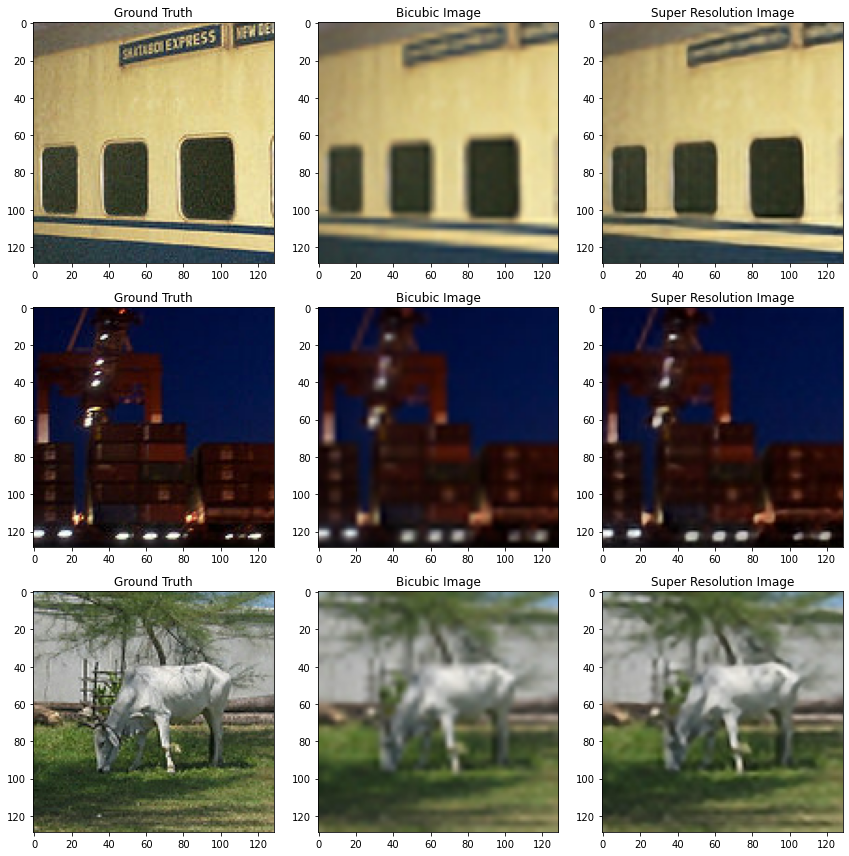

In [4]:
import torch.nn as nn
import torch
import os
import shutil
import torchvision.utils
from torchvision.datasets.vision import VisionDataset
from PIL import Image
from torchvision.datasets.utils import download_url, verify_str_arg, download_and_extract_archive
import torchvision.transforms as T
from torch.utils.data import DataLoader
import numpy as np
import time
import matplotlib.pyplot as plt


##########################################
# STEP 1: Implement Super Resolution CNN #
##########################################
class SRCNN(nn.Module):
    def __init__(self, channels=1):
        super(SRCNN, self).__init__()
        self.conv1 = nn.Conv2d(channels, 64, kernel_size=9, padding=9 // 2)
        self.conv2 = nn.Conv2d(64, 32, kernel_size=5, padding=5 // 2)
        self.conv3 = nn.Conv2d(32, channels, kernel_size=5, padding=5 // 2)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        out = self.relu(self.conv1(x))
        out = self.relu(self.conv2(out))
        out = self.conv3(out)
        return out


#%%

###################################################################
# STEP 2: Create DataLoader using Modified version of VOC Dataset #
###################################################################

# Customize torch VOCDataset: Change the target, and enable transforming image into YCbCr format
class VOCDataset(VisionDataset):
    url = "https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/semantic_contours/benchmark.tgz"
    md5 = "82b4d87ceb2ed10f6038a1cba92111cb"
    filename = "benchmark.tgz"

    voc_train_url = "http://home.bharathh.info/pubs/codes/SBD/train_noval.txt"
    voc_split_filename = "train_noval.txt"
    voc_split_md5 = "79bff800c5f0b1ec6b21080a3c066722"

    def __init__(self, root, image_set="train", im_type='RGB', download=False, transform=None, target_transform=None):
        try:
            from scipy.io import loadmat
            self._loadmat = loadmat
        except ImportError:
            raise RuntimeError("Scipy is not found. This dataset needs to have scipy installed: "
                               "pip install scipy")

        super(VOCDataset, self).__init__(root, transform=transform, target_transform=target_transform)
        self.image_set = verify_str_arg(image_set, "image_set", ("train", "val", "train_noval"))

        self.im_type = im_type
        sbd_root = self.root
        image_dir = os.path.join(sbd_root, 'img')

        if download:
            download_and_extract_archive(self.url, self.root, filename=self.filename, md5=self.md5)
            extracted_ds_root = os.path.join(self.root, "benchmark_RELEASE", "dataset")
            for f in ["cls", "img", "inst", "train.txt", "val.txt"]:
                old_path = os.path.join(extracted_ds_root, f)
                shutil.move(old_path, sbd_root)
            download_url(self.voc_train_url, sbd_root, self.voc_split_filename,
                         self.voc_split_md5)

        if not os.path.isdir(sbd_root):
            raise RuntimeError('Dataset not found or corrupted.' +
                               ' You can use download=True to download it')

        split_f = os.path.join(sbd_root, image_set.rstrip('\n') + '.txt')

        with open(os.path.join(split_f), "r") as fh:
            file_names = [x.strip() for x in fh.readlines()]

        self.images = [os.path.join(image_dir, x + ".jpg") for x in file_names]

    def __getitem__(self, index):
        if self.im_type == 'RGB':
            img = Image.open(self.images[index]).convert('RGB')
        elif self.im_type == 'Y':
            img = Image.open(self.images[index]).convert('YCbCr')
            img, _, _ = img.split()
        elif self.im_type == 'YCbCr':
            img = Image.open(self.images[index]).convert('YCbCr')

        target = img.copy()

        if self.transform is not None:
            img = self.transform(img)

        if self.target_transform is not None:
            target = self.target_transform(target)

        return img, target

    def __len__(self):
        return len(self.images)

#%%


# Train transform: Get 33x33 patch and scale it by 3 to get a low res image
train_transform = T.Compose([T.CenterCrop((33, 33)),
                             T.Resize((11, 11), interpolation=torchvision.transforms.InterpolationMode.BICUBIC),
                             T.Resize((33, 33), interpolation=torchvision.transforms.InterpolationMode.BICUBIC),
                             T.ToTensor()])

# Val transform: Same as Train transform
val_transform = T.Compose([T.CenterCrop((33, 33)),
                           T.Resize((11, 11), interpolation=torchvision.transforms.InterpolationMode.BICUBIC),
                           T.Resize((33, 33), interpolation=torchvision.transforms.InterpolationMode.BICUBIC),
                           T.ToTensor()])

# Target transform: Get 33x33 patch without scaling
target_transform = T.Compose([T.CenterCrop((33, 33)),
                              T.ToTensor()])


try:
    voc_ds_train = VOCDataset(root="./", image_set='train', download=False,
                              transform=train_transform, target_transform=target_transform, im_type='Y')
except:
    voc_ds_train = VOCDataset(root="./", image_set='train', download=True,
                              transform=train_transform, target_transform=target_transform, im_type='Y')

voc_dl_train = DataLoader(voc_ds_train, batch_size=64, shuffle=True)

# Validation Data
try:
    voc_ds_val = VOCDataset(root='./', image_set='val', download=False,
                            transform=val_transform, target_transform=target_transform, im_type='Y')
except:
    voc_ds_val = VOCDataset(root='./', image_set='val', download=True,
                            transform=val_transform, target_transform=target_transform, im_type='Y')

voc_dl_val = DataLoader(voc_ds_val, batch_size=64)

print('Total {} Training Dataset'.format(len(voc_ds_train)))
print('Total {} Validation Dataset'.format(len(voc_ds_val)))


#%%

###########################
# STEP 3: Train the model #
###########################

# Define PSNR to evaluate the performance
class PSNR(object):
    @staticmethod
    def __call__(img1, img2):
        mse = torch.mean((img1 - img2) ** 2)
        return 20 * torch.log10(255.0 / torch.sqrt(mse))


model = SRCNN()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.MSELoss()

optimizer = torch.optim.Adam([
        {'params': model.conv1.parameters()},
        {'params': model.conv2.parameters()},
        {'params': model.conv3.parameters(), 'lr': 1e-5}
    ], lr=1e-4)

best_psnr = 0
total_time = 0
for epoch in range(400):
    print(f"\nStart Epoch {epoch + 1:4d}/400")
    tick = time.time()
    model.train()
    for img, target in voc_dl_train:
        optimizer.zero_grad()
        img, target = img.to(device), target.to(device)
        recon = model(img)

        loss = criterion(recon, target)
        loss.backward()
        optimizer.step()

        print(f"\rEpoch {epoch + 1:4d} Loss {loss.item():.6f}", end='')

    psnr = 0.
    count = 0
    model.eval()
    with torch.no_grad():
        for img, target in voc_dl_val:
            img, target = img.to(device), target.to(device)
            recon = model(img)

            psnr += PSNR()(recon * 255.0, target * 255.0) * target.shape[0]
            count += target.shape[0]

        psnr /= count
        print(f"Epoch {epoch + 1:4d} Val PSNR {psnr:.6f}")

    if best_psnr < psnr:
        best_psnr = psnr
        print(f"New Best PSNR {best_psnr:.6f}")
        torch.save({
            "model_state_dict": model.state_dict()
        }, 'srcnn.pt')

    tock = time.time()

    total_time += tock - tick

    print(f"Epoch {epoch + 1:4d} Time {tock - tick:.6f}")

print(f"Best PSNR {best_psnr:.6f}")
print(f"Total Time {total_time:.6f}")


#%%


########################################################
# STEP 4: Evaluate the saved model using sample images #
########################################################

model = SRCNN()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

ckpt = torch.load('srcnn.pt')
model.load_state_dict(ckpt['model_state_dict'])
model.eval()



# Test transform: Get 128x128 patch and scale it by 3.
test_transform = T.Compose([T.CenterCrop((129, 129)),
                           T.Resize((43, 43), interpolation=torchvision.transforms.InterpolationMode.BICUBIC),
                           T.Resize((129, 129), interpolation=torchvision.transforms.InterpolationMode.BICUBIC),
                           T.ToTensor()])

# Test target transform: Get same 128x128 patch without scaling
test_target_transform = T.Compose([T.CenterCrop((129, 129)),
                                   T.ToTensor()])

try:
    voc_ds_test = VOCDataset(root='./', image_set='val', download=False,
                             transform=test_transform, target_transform=test_target_transform, im_type='YCbCr')
except:
    voc_ds_test = VOCDataset(root='./', image_set='val', download=True,
                             transform=test_transform, target_transform=test_target_transform, im_type='YCbCr')

voc_dl_test = DataLoader(voc_ds_test, batch_size=3, shuffle=False)


# Get 3 samples
test_img, test_target = next(iter(voc_dl_test))
test_img, test_target = test_img.to(device), test_target.to(device)
lr_img = test_img.clone().detach().cpu()

# Get only the Y channel
test_img_y = test_img[:,0:1,:,:]


#%%

recon_y = model(test_img_y)

print(f"Average PSNR: {PSNR()(recon_y * 255.0, test_target[:, 0:1, :, :] * 255.0)}")
test_img[:, 0:1, :, :] = recon_y


#%%

# Convert ycbcr tensor to RGB image
def convert_to_rgb(ycbcr_tensor):
    ycbcr_tensor *= 255.0
    ycbcr_tensor = ycbcr_tensor.clip(0, 255)
    ycbcr_ndarray = np.uint8(ycbcr_tensor.detach().cpu())
    img_y = Image.fromarray(ycbcr_ndarray[0, :, :], mode='L')
    img_cb = Image.fromarray(ycbcr_ndarray[1, :, :], mode='L')
    img_cr = Image.fromarray(ycbcr_ndarray[2, :, :], mode='L')
    img = Image.merge("YCbCr", [img_y, img_cb, img_cr]).convert("RGB")
    return img

#%%

fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for i in range(3):
    recon_img = convert_to_rgb(test_img[i])
    lr = convert_to_rgb(lr_img[i])
    gt_img = convert_to_rgb(test_target[i])
    axs[i, 0].imshow(gt_img)
    axs[i, 0].set_title('Ground Truth')
    axs[i, 1].imshow(lr)
    axs[i, 1].set_title('Bicubic Image')
    axs[i, 2].imshow(recon_img)
    axs[i, 2].set_title('Super Resolution Image')
plt.tight_layout()
plt.show()




# VDSR

Total 8498 Training Dataset
Total 2857 Validation Dataset

Start Epoch    1/100


/home/ernestryu/.conda/envs/mainenv/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch    1 Val PSNR 22.167561
New Best PSNR 22.167561
Epoch    1 Time 71.2630

Start Epoch    2/100
Epoch    2 Val PSNR 22.243099
New Best PSNR 22.243099
Epoch    2 Time 72.2307

Start Epoch    3/100
Epoch    3 Val PSNR 22.350876
New Best PSNR 22.350876
Epoch    3 Time 72.7732

Start Epoch    4/100
Epoch    4 Val PSNR 22.418219
New Best PSNR 22.418219
Epoch    4 Time 71.2564

Start Epoch    5/100
Epoch    5 Val PSNR 22.385635
Epoch    5 Time 71.1034

Start Epoch    6/100
Epoch    6 Val PSNR 22.438658
New Best PSNR 22.438658
Epoch    6 Time 71.4102

Start Epoch    7/100
Epoch    7 Val PSNR 22.383957
Epoch    7 Time 71.2825

Start Epoch    8/100
Epoch    8 Val PSNR 22.493378
New Best PSNR 22.493378
Epoch    8 Time 70.9058

Start Epoch    9/100
Epoch    9 Val PSNR 22.466198
Epoch    9 Time 71.2079

Start Epoch   10/100
Epoch   10 Val PSNR 22.465345
Epoch   10 Time 70.8789

Start Epoch   11/100
Epoch   11 Val PSNR 22.532467
New Best PSNR 22.532467
Epoch   11 Time 71.2726

Start Epoch   12/

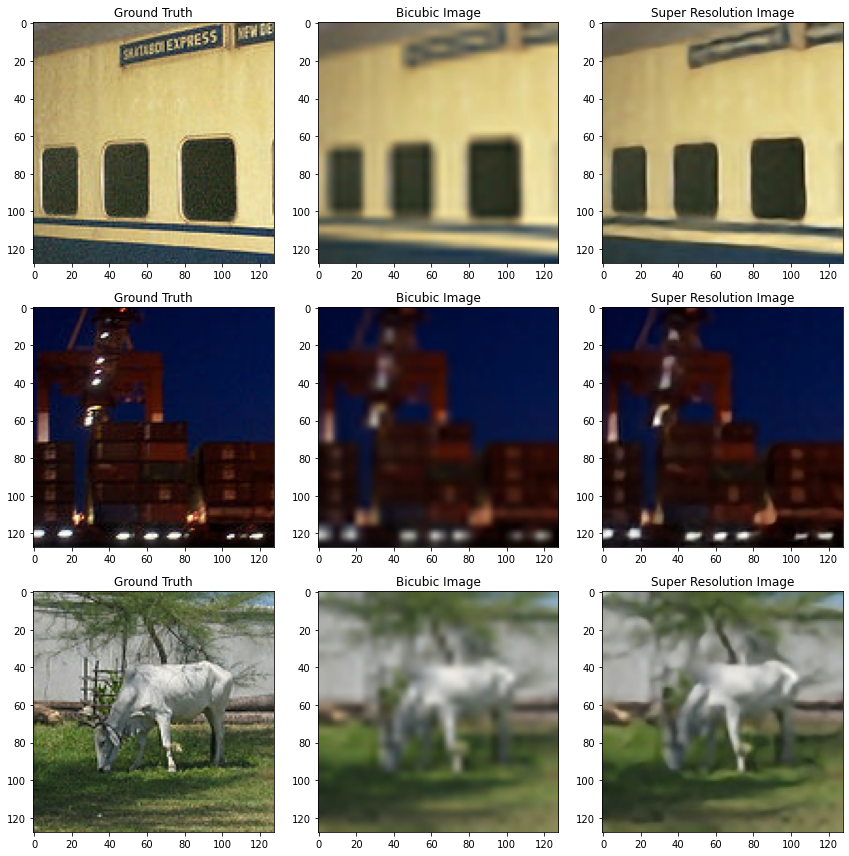

In [5]:
import torch.nn as nn
import torch
import os
import shutil
import torchvision.utils
from torchvision.datasets.vision import VisionDataset
from PIL import Image
from torchvision.datasets.utils import download_url, verify_str_arg, download_and_extract_archive
import torchvision.transforms as T
from torch.utils.data import DataLoader
import numpy as np
import time
import matplotlib.pyplot as plt


################################################
# STEP 1: Implement Very Deep Super Resolution #
################################################
class VDSR(nn.Module):
    def __init__(self, channels=1, depth=20):
        super(VDSR, self).__init__()
        self.head = nn.Conv2d(in_channels=channels, out_channels=64, kernel_size=3, stride=1, padding=1, bias=False)

        self.body = []
        for i in range(depth-2):
            self.body.append(nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, bias=False))
            self.body.append(nn.ReLU(inplace=True))
        self.body = nn.ModuleList(self.body)

        self.tail = nn.Conv2d(in_channels=64, out_channels=channels, kernel_size=3, stride=1, padding=1, bias=False)

        self._initialize_weights()

    def forward(self, x):
        residual = x
        out = self.head(x)
        for i in range(len(self.body)):
            out = self.body[i](out)
        out = self.tail(out)
        return out + residual

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode="fan_out", nonlinearity="relu")
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)


#%%

###################################################################
# STEP 2: Create DataLoader using Modified version of VOC Dataset #
###################################################################

# Customize torch VOCDataset: Change the target, and enable transforming image into YCbCr format
class VOCDataset(VisionDataset):
    url = "https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/semantic_contours/benchmark.tgz"
    md5 = "82b4d87ceb2ed10f6038a1cba92111cb"
    filename = "benchmark.tgz"

    voc_train_url = "http://home.bharathh.info/pubs/codes/SBD/train_noval.txt"
    voc_split_filename = "train_noval.txt"
    voc_split_md5 = "79bff800c5f0b1ec6b21080a3c066722"

    def __init__(self, root, image_set="train", im_type='RGB', download=False, transform=None, target_transform=None):
        try:
            from scipy.io import loadmat
            self._loadmat = loadmat
        except ImportError:
            raise RuntimeError("Scipy is not found. This dataset needs to have scipy installed: "
                               "pip install scipy")

        super(VOCDataset, self).__init__(root, transform=transform, target_transform=target_transform)
        self.image_set = verify_str_arg(image_set, "image_set", ("train", "val", "train_noval"))

        self.im_type = im_type
        sbd_root = self.root
        image_dir = os.path.join(sbd_root, 'img')

        if download:
            download_and_extract_archive(self.url, self.root, filename=self.filename, md5=self.md5)
            extracted_ds_root = os.path.join(self.root, "benchmark_RELEASE", "dataset")
            for f in ["cls", "img", "inst", "train.txt", "val.txt"]:
                old_path = os.path.join(extracted_ds_root, f)
                shutil.move(old_path, sbd_root)
            download_url(self.voc_train_url, sbd_root, self.voc_split_filename,
                         self.voc_split_md5)

        if not os.path.isdir(sbd_root):
            raise RuntimeError('Dataset not found or corrupted.' +
                               ' You can use download=True to download it')

        split_f = os.path.join(sbd_root, image_set.rstrip('\n') + '.txt')

        with open(os.path.join(split_f), "r") as fh:
            file_names = [x.strip() for x in fh.readlines()]

        self.images = [os.path.join(image_dir, x + ".jpg") for x in file_names]

    def __getitem__(self, index):
        if self.im_type == 'RGB':
            img = Image.open(self.images[index]).convert('RGB')
        elif self.im_type == 'Y':
            img = Image.open(self.images[index]).convert('YCbCr')
            img, _, _ = img.split()
        elif self.im_type == 'YCbCr':
            img = Image.open(self.images[index]).convert('YCbCr')

        target = img.copy()

        if self.transform is not None:
            img = self.transform(img)

        if self.target_transform is not None:
            target = self.target_transform(target)

        return img, target

    def __len__(self):
        return len(self.images)


# Train transform: Get 40x40 patch, and scale it by 4 to get a low res image
train_transform = T.Compose([T.CenterCrop((40, 40)),
                             T.Resize((10, 10), interpolation=torchvision.transforms.InterpolationMode.BICUBIC),
                             T.Resize((40, 40), interpolation=torchvision.transforms.InterpolationMode.BICUBIC),
                             T.ToTensor()])

# Val transform: Same as Train transform
val_transform = T.Compose([T.CenterCrop((40, 40)),
                           T.Resize((10, 10), interpolation=torchvision.transforms.InterpolationMode.BICUBIC),
                           T.Resize((40, 40), interpolation=torchvision.transforms.InterpolationMode.BICUBIC),
                           T.ToTensor()])

# Target transform: Get 40x40 patch without scaling
target_transform = T.Compose([T.CenterCrop((40, 40)),
                              T.ToTensor()])


try:
    voc_ds_train = VOCDataset(root='./', image_set='train', download=False,
                              transform=train_transform, target_transform=target_transform, im_type='Y')
except:
    voc_ds_train = VOCDataset(root='./', image_set='train', download=True,
                              transform=train_transform, target_transform=target_transform, im_type='Y')

voc_dl_train = DataLoader(voc_ds_train, batch_size=64, shuffle=True)

# Validation Data
try:
    voc_ds_val = VOCDataset(root='./', image_set='val', download=False,
                            transform=val_transform, target_transform=target_transform, im_type='Y')
except:
    voc_ds_val = VOCDataset(root='./', image_set='val', download=True,
                            transform=val_transform, target_transform=target_transform, im_type='Y')

voc_dl_val = DataLoader(voc_ds_val, batch_size=64)

print('Total {} Training Dataset'.format(len(voc_ds_train)))
print('Total {} Validation Dataset'.format(len(voc_ds_val)))


###########################
# STEP 3: Train the model #
###########################

# Define PSNR to evaluate the performance
class PSNR(object):
    @staticmethod
    def __call__(img1, img2):
        mse = torch.mean((img1 - img2) ** 2)
        return 20 * torch.log10(255.0 / torch.sqrt(mse))


model = VDSR(channels=1, depth=20)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.MSELoss(size_average=False)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-4)

lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)

best_psnr = 0
total_time = 0
for epoch in range(100):
    print(f"\nStart Epoch {epoch + 1:4d}/100")
    tick = time.time()
    model.train()
    for img, target in voc_dl_train:
        optimizer.zero_grad()

        img, target = img.to(device), target.to(device)
        recon = model(img)

        loss = criterion(recon, target)
        loss.backward()

        nn.utils.clip_grad_norm_(model.parameters(), 0.4)
        optimizer.step()

        print(f"Epoch {epoch + 1:4d} Loss {loss.item():.8}", end='\r')

    psnr = 0.
    count = 0
    model.eval()
    with torch.no_grad():
        for img, target in voc_dl_val:
            img, target = img.to(device), target.to(device)

            recon = model(img)

            psnr += PSNR()(recon * 255.0, target * 255.0) * target.shape[0]
            count += img.shape[0]

        psnr /= count
        print(f"Epoch {epoch + 1:4d} Val PSNR {psnr:.6f}")

    if best_psnr < psnr:
        best_psnr = psnr
        print(f"New Best PSNR {best_psnr:.6f}")
        torch.save({
            "model_state_dict": model.state_dict()
        }, 'vdsr.pt')

    tock = time.time()

    total_time += tock - tick

    print(f"Epoch {epoch + 1:4d} Time {tock - tick:.4f}")

    lr_scheduler.step()

print(f"Best PSNR {best_psnr:.6f}")
print(f"Total Time {total_time:.4f}")


#%%

########################################################
# STEP 4: Evaluate the saved model using sample images #
########################################################
model = VDSR(channels=1, depth=20)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

ckpt = torch.load('vdsr.pt')
model.load_state_dict(ckpt['model_state_dict'])
model.eval()

#%%

# Test transform: Get 128x128 patch and scale it by 4.
test_transform = T.Compose([T.CenterCrop((128, 128)),
                           T.Resize((32, 32), interpolation=torchvision.transforms.InterpolationMode.BICUBIC),
                           T.Resize((128, 128), interpolation=torchvision.transforms.InterpolationMode.BICUBIC),
                           T.ToTensor()])

# Test target transform: Get same 128x128 patch without scaling
test_target_transform = T.Compose([T.CenterCrop((128, 128)),
                                   T.ToTensor()])

try:
    voc_ds_test = VOCDataset(root='./', image_set='val', download=False,
                             transform=test_transform, target_transform=test_target_transform, im_type='YCbCr')
except:
    voc_ds_test = VOCDataset(root='./', image_set='val', download=True,
                             transform=test_transform, target_transform=test_target_transform, im_type='YCbCr')

voc_dl_test = DataLoader(voc_ds_test, batch_size=3, shuffle=False)


# Get 3 samples
test_img, test_target = next(iter(voc_dl_test))
test_img, test_target = test_img.to(device), test_target.to(device)
lr_img = test_img.clone().detach().cpu()

# Get only the Y channel
test_img_y = test_img[:,0:1,:,:]


#%%

recon_y = model(test_img_y)

print(f"Average PSNR: {PSNR()(recon_y * 255.0, test_target[:, 0:1, :, :] * 255.0)}")
test_img[:, 0:1, :, :] = recon_y


#%%

# Convert ycbcr tensor to RGB image
def convert_to_rgb(ycbcr_tensor):
    ycbcr_tensor *= 255.0
    ycbcr_tensor = ycbcr_tensor.clip(0, 255)
    ycbcr_ndarray = np.uint8(ycbcr_tensor.detach().cpu())
    img_y = Image.fromarray(ycbcr_ndarray[0, :, :], mode='L')
    img_cb = Image.fromarray(ycbcr_ndarray[1, :, :], mode='L')
    img_cr = Image.fromarray(ycbcr_ndarray[2, :, :], mode='L')
    img = Image.merge("YCbCr", [img_y, img_cb, img_cr]).convert("RGB")
    return img

#%%


fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for i in range(3):
    recon_img = convert_to_rgb(test_img[i])
    lr = convert_to_rgb(lr_img[i])
    gt_img = convert_to_rgb(test_target[i])
    axs[i, 0].imshow(gt_img)
    axs[i, 0].set_title('Ground Truth')
    axs[i, 1].imshow(lr)
    axs[i, 1].set_title('Bicubic Image')
    axs[i, 2].imshow(recon_img)
    axs[i, 2].set_title('Super Resolution Image')
plt.tight_layout()
plt.show()



# UNet

Total 8498 Training Dataset
Total 2857 Validation Dataset
Epoch    1/2 Loss 1.797621
Epoch    1/2 Val Loss 1.406209
Epoch    1/2 Val Pixelwise Accuracy 69.9001693725586%
Saving Model
Training Time for Epoch    1: 208.4561

Epoch    2/2 Loss 1.398266
Epoch    2/2 Val Loss 1.345773
Epoch    2/2 Val Pixelwise Accuracy 69.90174102783203%
Saving Model
Training Time for Epoch    2: 209.8401

Total Training Time: 418.2969


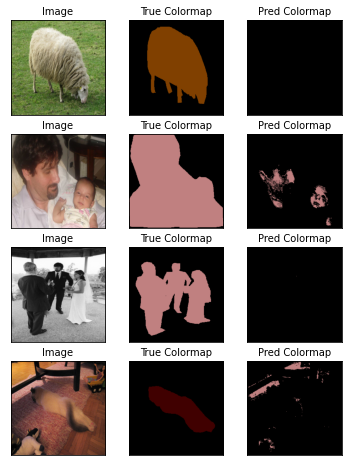

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision.datasets import SBDataset
from torchvision.transforms import functional as TF
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time
from PIL import Image
import random

###########################
# STEP 1 : Construct UNet #
###########################
BN_EPS = 1e-4


# Basic Conv-BatchNorm-ReLU Block
class ConvBnRelu2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=(3, 3), padding=1):
        super(ConvBnRelu2d, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, padding=padding, bias=False)
        self.bn = nn.BatchNorm2d(out_channels, eps=BN_EPS)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x


# Encoder Block
class StackEncoder(nn.Module):
    def __init__(self, x_channels, y_channels, kernel_size=(3, 3)):
        super(StackEncoder, self).__init__()
        padding = (kernel_size - 1) // 2
        self.encode = nn.Sequential(
            ConvBnRelu2d(x_channels, y_channels, kernel_size=kernel_size, padding=padding),
            ConvBnRelu2d(y_channels, y_channels, kernel_size=kernel_size, padding=padding),
        )

    def forward(self, x):
        x = self.encode(x)
        x_small = F.max_pool2d(x, kernel_size=2, stride=2)
        return x, x_small


# Decoder Block
class StackDecoder(nn.Module):
    def __init__(self, x_big_channels, x_channels, y_channels, kernel_size=3):
        super(StackDecoder, self).__init__()
        padding = (kernel_size - 1) // 2

        self.decode = nn.Sequential(
            ConvBnRelu2d(x_big_channels + x_channels, y_channels, kernel_size=kernel_size, padding=padding),
            ConvBnRelu2d(y_channels, y_channels, kernel_size=kernel_size, padding=padding),
            ConvBnRelu2d(y_channels, y_channels, kernel_size=kernel_size, padding=padding),
        )

    def forward(self, x, down_tensor):
        _, channels, height, width = down_tensor.size()
        x = F.upsample(x, size=(height, width), mode='bilinear')
        x = torch.cat([x, down_tensor], 1)
        x = self.decode(x)
        return x


class StackDecoder(nn.Module):
    def __init__(self, x_big_channels, x_channels, y_channels, kernel_size=3):
        super(StackDecoder, self).__init__()
        padding = (kernel_size - 1) // 2

        self.up = nn.ConvTranspose2d(x_channels, x_channels, kernel_size=2, stride=2)

        self.decode = nn.Sequential(
            ConvBnRelu2d(x_big_channels + x_channels, y_channels, kernel_size=kernel_size, padding=padding),
            ConvBnRelu2d(y_channels, y_channels, kernel_size=kernel_size, padding=padding),
            ConvBnRelu2d(y_channels, y_channels, kernel_size=kernel_size, padding=padding),
        )

    def forward(self, x, down_tensor):
        _, channels, height, width = down_tensor.size()
        x = self.up(x)
        x = torch.cat([x, down_tensor], 1)
        x = self.decode(x)
        return x


# UNet
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        self.down1 = StackEncoder(3, 24, kernel_size=3)  # 128
        self.down2 = StackEncoder(24, 64, kernel_size=3)  # 64
        self.down3 = StackEncoder(64, 128, kernel_size=3)  # 32
        self.down4 = StackEncoder(128, 256, kernel_size=3)  # 16
        self.down5 = StackEncoder(256, 512, kernel_size=3)  # 8

        self.up5 = StackDecoder(512, 512, 256, kernel_size=3)  # 16
        self.up4 = StackDecoder(256, 256, 128, kernel_size=3)  # 32
        self.up3 = StackDecoder(128, 128, 64, kernel_size=3)  # 64
        self.up2 = StackDecoder(64, 64, 24, kernel_size=3)  # 128
        self.up1 = StackDecoder(24, 24, 24, kernel_size=3)  # 256

        self.classify = nn.Conv2d(24, 21, kernel_size=1, bias=True)

        self.center = nn.Sequential(ConvBnRelu2d(512, 512, kernel_size=3, padding=1))

    def forward(self, x):
        out = x
        down1, out = self.down1(out)
        down2, out = self.down2(out)
        down3, out = self.down3(out)
        down4, out = self.down4(out)
        down5, out = self.down5(out)

        out = self.center(out)

        out = self.up5(out, down5)
        out = self.up4(out, down4)
        out = self.up3(out, down3)
        out = self.up2(out, down2)
        out = self.up1(out, down1)

        out = self.classify(out)

        return out


###############################################
# STEP2: Prepare Dataset (SBData: PASCAL VOC) #
###############################################
batch_size = 32


# Custom Transform Functions required for the Dataset
class Compose(object):
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image, target):
        for t in self.transforms:
            image, target = t(image, target)
        return image, target


class Resize(object):
    def __init__(self, size):
        self.size = size

    def __call__(self, image, target):
        image = TF.resize(image, self.size)
        target = TF.resize(target, self.size, interpolation=Image.NEAREST)
        return image, target


class RandomHorizontalFlip(object):
    def __init__(self, flip_prob):
        self.flip_prob = flip_prob

    def __call__(self, image, target):
        if random.random() < self.flip_prob:
            image = TF.hflip(image)
            target = TF.hflip(target)
        return image, target


class RandomVerticalFlip(object):
    def __init__(self, flip_prob):
        self.flip_prob = flip_prob

    def __call__(self, image, target):
        if random.random() < self.flip_prob:
            image = TF.vflip(image)
            target = TF.vflip(target)
        return image, target


class ToTensor(object):
    def __call__(self, image, target):
        image = TF.to_tensor(image)
        target = torch.as_tensor(np.array(target), dtype=torch.int64)
        target[target == 255] = 0

        return image, target


T_train = Compose([Resize((256, 256)), RandomVerticalFlip(0.5), RandomHorizontalFlip(0.5), ToTensor()])
T_val = Compose([Resize((256, 256)), ToTensor()])

# Training Data
try:
    voc_ds_train = SBDataset(root='.', image_set='train', download=False, mode='segmentation',
                             transforms=T_train)
except:
    voc_ds_train = SBDataset(root='.', image_set='train', download=True, mode='segmentation',
                             transforms=T_train)

voc_dl_train = DataLoader(voc_ds_train, batch_size=batch_size, shuffle=True)

# Validation Data
try:
    voc_ds_val = SBDataset(root='.', image_set='val', download=False, mode='segmentation',
                           transforms=T_val)
except:
    voc_ds_val = SBDataset(root='.', image_set='val', download=True, mode='segmentation',
                           transforms=T_val)

voc_dl_val = DataLoader(voc_ds_val, batch_size=batch_size)

print('Total {} Training Dataset'.format(len(voc_ds_train)))
print('Total {} Validation Dataset'.format(len(voc_ds_val)))


###########################
# STEP3: Prepare Training #
###########################

# Define Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# Define Model
model = UNet()
model = model.to(device)

# Define Criterion (or Loss)
criterion = torch.nn.CrossEntropyLoss()

# Define Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training
epochs = 2

best_accuracy = 0
loss_list = []
start = time.time()
for epoch in range(epochs):
    ep_start = time.time()
    model.train()
    batch_loss_list = []
    for img, mask in voc_dl_train:
        img, mask = img.to(device), mask.to(device)
        output = model(img)

        optimizer.zero_grad()
        loss = criterion(output, mask)
        loss.backward()
        optimizer.step()
        batch_loss_list.append(loss.item())

    print('Epoch {:4d}/{} Loss {:.6f}'.format(epoch + 1, epochs, sum(batch_loss_list) / len(batch_loss_list)))

    model.eval()
    batch_loss_list = []
    correct = 0
    count = 0
    with torch.no_grad():
        for img, mask in voc_dl_val:
            img, mask = img.to(device), mask.to(device)
            output = model(img)
            loss = criterion(output, mask)
            batch_loss_list.append(loss.item())

            pred = torch.argmax(output, dim=1)
            correct += (pred == mask).sum()
            count += mask.numel()
        accuracy = correct / count * 100
        print('Epoch {:4d}/{} Val Loss {:.6f}'.format(epoch + 1, epochs, sum(batch_loss_list) / len(batch_loss_list)))
        print('Epoch {:4d}/{} Val Pixelwise Accuracy {}%'.format(epoch + 1, epochs, accuracy))

        if accuracy > best_accuracy:
            print('Saving Model')
            best_accuracy = accuracy
            torch.save({
                'model_state_dict': model.state_dict()
            }, 'unet_voc_2012_acc.pt')
    ep_end = time.time()
    print('Training Time for Epoch {:4d}: {:.4f}\n'.format(epoch + 1, ep_end - ep_start))
end = time.time()
print('Total Training Time: {:.4f}'.format(end - start))


#######################################################
# STEP4: Visualize the result from Validation Samples #
#######################################################

# Define RGB corresponding to each class
VOC_COLORMAP = [
    [0, 0, 0],
    [128, 0, 0],
    [0, 128, 0],
    [128, 128, 0],
    [0, 0, 128],
    [128, 0, 128],
    [0, 128, 128],
    [128, 128, 128],
    [64, 0, 0],
    [192, 0, 0],
    [64, 128, 0],
    [192, 128, 0],
    [64, 0, 128],
    [192, 0, 128],
    [64, 128, 128],
    [192, 128, 128],
    [0, 64, 0],
    [128, 64, 0],
    [0, 192, 0],
    [128, 192, 0],
    [0, 64, 128],
]


# Function to convert mask to colormap
def mask_to_colormap(mask):
    mask_shape = mask.shape
    colormap = torch.empty((mask_shape[0], mask_shape[1], 3))
    for i in range(mask_shape[0]):
        for j in range(mask_shape[1]):
            colormap[i][j] = torch.Tensor(VOC_COLORMAP[mask[i][j]])
    return colormap.type(torch.LongTensor)


# Visualize randomly chosen 4 samples from Validation Data
voc_dl_val = DataLoader(voc_ds_val, batch_size=batch_size, shuffle=True)

with torch.no_grad():
    model.eval()
    img, mask = next(iter(voc_dl_val))
    img, mask = img.to(device), mask.to(device)
    output = model(img)
    output = torch.argmax(output, dim=1)
    fig, axs = plt.subplots(4, 3)
    fig.set_size_inches(6, 8)
    for i, ax in enumerate(axs.ravel()):
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])

        if i % 3 == 0:
            ax.set_title("Image", fontsize=10)
            ax.imshow(img[i // 3].permute(1, 2, 0).detach().cpu())
        if i % 3 == 1:
            ax.set_title("True Colormap", fontsize=10)
            ax.imshow(mask_to_colormap(mask[i // 3]))
        if i % 3 == 2:
            colormap = mask_to_colormap(output[i // 3])
            ax.set_title("Pred Colormap", fontsize=10)
            ax.imshow(colormap)
    plt.show()

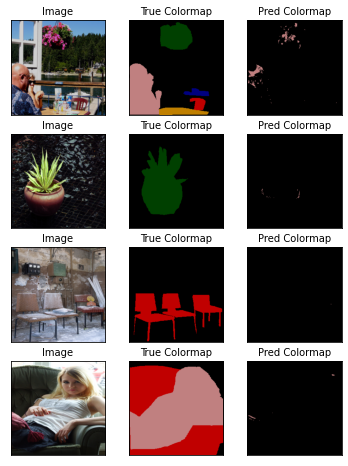

In [11]:

# Visualize randomly chosen 4 samples from Validation Data
voc_dl_val = DataLoader(voc_ds_val, batch_size=batch_size, shuffle=True)

with torch.no_grad():
    model.eval()
    img, mask = next(iter(voc_dl_val))
    img, mask = img.to(device), mask.to(device)
    output = model(img)
    output = torch.argmax(output, dim=1)
    fig, axs = plt.subplots(4, 3)
    fig.set_size_inches(6, 8)
    for i, ax in enumerate(axs.ravel()):
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])

        if i % 3 == 0:
            ax.set_title("Image", fontsize=10)
            ax.imshow(img[i // 3].permute(1, 2, 0).detach().cpu())
        if i % 3 == 1:
            ax.set_title("True Colormap", fontsize=10)
            ax.imshow(mask_to_colormap(mask[i // 3]))
        if i % 3 == 2:
            colormap = mask_to_colormap(output[i // 3])
            ax.set_title("Pred Colormap", fontsize=10)
            ax.imshow(colormap)
    plt.show()

# FCN

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.hub import load_state_dict_from_url
from torchvision.datasets import SBDataset
from torchvision.transforms import functional as TF
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time
from PIL import Image
import random
from collections import OrderedDict


#####################################################################
# STEP 1 : Construct Fully Convolutional Network (from torchvision) #
#####################################################################

# create backbone: ResNet
model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-f37072fd.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-b627a593.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-0676ba61.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-63fe2227.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-394f9c45.pth',
    'resnext50_32x4d': 'https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth',
    'resnext101_32x8d': 'https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth',
    'wide_resnet50_2': 'https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth',
    'wide_resnet101_2': 'https://download.pytorch.org/models/wide_resnet101_2-32ee1156.pth',
}


def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)


def conv1x1(in_planes, out_planes, stride=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion: int = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, norm_layer=None):
        super(BasicBlock, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    expansion: int = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(Bottleneck, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 64.)) * groups
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False, groups=1,
                 width_per_group=64, replace_stride_with_dilation=None, norm_layer=None):
        super(ResNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            replace_stride_with_dilation = [False, False, False]
        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2,
                                       dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                                       dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2,
                                       dilate=replace_stride_with_dilation[2])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups,
                            self.base_width, previous_dilation, norm_layer))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups,
                                base_width=self.base_width, dilation=self.dilation,
                                norm_layer=norm_layer))

        return nn.Sequential(*layers)

    def _forward_impl(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def forward(self, x):
        return self._forward_impl(x)


def _resnet(arch, block, layers, pretrained, progress, **kwargs):
    model = ResNet(block, layers, **kwargs)
    if pretrained:
        state_dict = load_state_dict_from_url(model_urls[arch],
                                              progress=progress)
        model.load_state_dict(state_dict)
    return model


def resnet50(pretrained=False, progress=True, **kwargs):
    return _resnet('resnet50', Bottleneck, [3, 4, 6, 3], pretrained, progress,
                   **kwargs)


# create Fully Convolutional Network
class FCN(nn.Module):

    def __init__(self, backbone, classifier):
        super(FCN, self).__init__()
        self.backbone = backbone
        self.classifier = classifier

    def forward(self, x):
        input_shape = x.shape[-2:]
        features = self.backbone(x)

        x = features["out"]
        x = self.classifier(x)
        x = F.interpolate(x, size=input_shape, mode='bilinear', align_corners=False)
        result = x

        return result


class FCNHead(nn.Sequential):
    def __init__(self, in_channels, channels):
        inter_channels = in_channels // 4
        layers = [
            nn.Conv2d(in_channels, inter_channels, 3, padding=1, bias=False),
            nn.BatchNorm2d(inter_channels),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Conv2d(inter_channels, channels, 1)
        ]

        super(FCNHead, self).__init__(*layers)


class IntermediateLayerGetter(nn.ModuleDict):
    def __init__(self, model, return_layers):
        if not set(return_layers).issubset([name for name, _ in model.named_children()]):
            raise ValueError("return_layers are not present in model")
        orig_return_layers = return_layers
        return_layers = {str(k): str(v) for k, v in return_layers.items()}
        layers = OrderedDict()
        for name, module in model.named_children():
            layers[name] = module
            if name in return_layers:
                del return_layers[name]
            if not return_layers:
                break

        super(IntermediateLayerGetter, self).__init__(layers)
        self.return_layers = orig_return_layers

    def forward(self, x):
        out = OrderedDict()
        for name, module in self.items():
            x = module(x)
            if name in self.return_layers:
                out_name = self.return_layers[name]
                out[out_name] = x
        return out


def fcn_resnet50(num_classes=21, pretrained_backbone=True):
    backbone = resnet50(
        pretrained=pretrained_backbone,
        replace_stride_with_dilation=[False, True, True])

    out_layer = 'layer4'
    out_inplanes = 2048
    return_layers = {out_layer: 'out'}
    backbone = IntermediateLayerGetter(backbone, return_layers=return_layers)

    classifier = FCNHead(out_inplanes, num_classes)
    base_model = FCN

    model = base_model(backbone, classifier)
    return model


###############################################
# STEP2: Prepare Dataset (SBData: PASCAL VOC) #
###############################################
batch_size = 32


# Custom Transform Functions required for the Dataset
class Compose(object):
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image, target):
        for t in self.transforms:
            image, target = t(image, target)
        return image, target


class Resize(object):
    def __init__(self, size):
        self.size = size

    def __call__(self, image, target):
        image = TF.resize(image, self.size)
        target = TF.resize(target, self.size, interpolation=Image.NEAREST)
        return image, target


class RandomHorizontalFlip(object):
    def __init__(self, flip_prob):
        self.flip_prob = flip_prob

    def __call__(self, image, target):
        if random.random() < self.flip_prob:
            image = TF.hflip(image)
            target = TF.hflip(target)
        return image, target


class RandomVerticalFlip(object):
    def __init__(self, flip_prob):
        self.flip_prob = flip_prob

    def __call__(self, image, target):
        if random.random() < self.flip_prob:
            image = TF.vflip(image)
            target = TF.vflip(target)
        return image, target


class ToTensor(object):
    def __call__(self, image, target):
        image = TF.to_tensor(image)
        target = torch.as_tensor(np.array(target), dtype=torch.int64)
        target[target >= 255] = 0

        return image, target


class Normalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, image, target):
        image = TF.normalize(image, self.mean, self.std)
        return image, target


T_train = Compose([Resize((224, 224)),
                   RandomVerticalFlip(0.5),
                   RandomHorizontalFlip(0.5),
                   ToTensor(),
                   Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

T_val = Compose([Resize((224, 224)),
                 ToTensor(),
                 Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

# Training Data
try:
    voc_ds_train = SBDataset(root='.', image_set='train', download=False, mode='segmentation',
                             transforms=T_train)
except:
    voc_ds_train = SBDataset(root='.', image_set='train', download=True, mode='segmentation',
                             transforms=T_train)

voc_dl_train = DataLoader(voc_ds_train, batch_size=batch_size, shuffle=True)

# Validation Data
try:
    voc_ds_val = SBDataset(root='.', image_set='val', download=False, mode='segmentation',
                           transforms=T_val)
except:
    voc_ds_val = SBDataset(root='.', image_set='val', download=True, mode='segmentation',
                           transforms=T_val)

voc_dl_val = DataLoader(voc_ds_val, batch_size=batch_size)

print('Total {} Training Dataset'.format(len(voc_ds_train)))
print('Total {} Validation Dataset'.format(len(voc_ds_val)))

#%%


###########################
# STEP3: Prepare Training #
###########################

# Define Device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Define Model
model = fcn_resnet50()
model = model.to(device)

#%%

# Define Criterion (or Loss)
criterion = torch.nn.CrossEntropyLoss()

# Define Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training
epochs = 10

best_accuracy = 0
loss_list = []
start = time.time()
for epoch in range(epochs):
    ep_start = time.time()
    model.train()
    batch_loss_list = []
    for img, mask in voc_dl_train:
        img, mask = img.to(device), mask.to(device)
        output = model(img)

        optimizer.zero_grad()
        loss = criterion(output, mask)
        loss.backward()
        optimizer.step()
        batch_loss_list.append(loss.item())

    print('Epoch {:4d}/{} Loss {:.6f}'.format(epoch + 1, epochs, sum(batch_loss_list) / len(batch_loss_list)))

    model.eval()
    batch_loss_list = []
    correct = 0
    count = 0
    with torch.no_grad():
        for img, mask in voc_dl_val:
            img, mask = img.to(device), mask.to(device)
            output = model(img)
            loss = criterion(output, mask)
            batch_loss_list.append(loss.item())

            pred = torch.argmax(output, dim=1)
            correct += (pred == mask).sum()
            count += mask.numel()
        accuracy = correct / count * 100
        print('Epoch {:4d}/{} Val Loss {:.6f}'.format(epoch + 1, epochs, sum(batch_loss_list) / len(batch_loss_list)))
        print('Epoch {:4d}/{} Val Pixelwise Accuracy {:.2f}%'.format(epoch + 1, epochs, accuracy))

        if accuracy > best_accuracy:
            print('Saving Model')
            best_accuracy = accuracy
            torch.save({
                'model_state_dict': model.state_dict()
            }, 'fcn_resnet101_voc_acc.pt')
    ep_end = time.time()
    print('Training Time for Epoch {:4d}: {:.4f}\n'.format(epoch + 1, ep_end - ep_start))
end = time.time()
print('Total Training Time: {:.4f}'.format(end - start))

#%%
#######################################################
# STEP4: Visualize the result from Validation Samples #
#######################################################
ckpt = torch.load('fcn_resnet101_voc_acc.pt')
model.load_state_dict(ckpt['model_state_dict'])

# Define RGB corresponding to each class
VOC_COLORMAP = [
    [0, 0, 0],
    [128, 0, 0],
    [0, 128, 0],
    [128, 128, 0],
    [0, 0, 128],
    [128, 0, 128],
    [0, 128, 128],
    [128, 128, 128],
    [64, 0, 0],
    [192, 0, 0],
    [64, 128, 0],
    [192, 128, 0],
    [64, 0, 128],
    [192, 0, 128],
    [64, 128, 128],
    [192, 128, 128],
    [0, 64, 0],
    [128, 64, 0],
    [0, 192, 0],
    [128, 192, 0],
    [0, 64, 128],
]


# Function to convert mask to colormap
def mask_to_colormap(mask):
    mask_shape = mask.shape
    colormap = torch.empty((mask_shape[0], mask_shape[1], 3))
    for i in range(mask_shape[0]):
        for j in range(mask_shape[1]):
            colormap[i][j] = torch.Tensor(VOC_COLORMAP[mask[i][j]])
    return colormap.type(torch.LongTensor)


T_plot = Compose([Resize((224, 224)),
                 ToTensor()])

try:
    voc_ds_val = SBDataset(root='.', image_set='val', download=False, mode='segmentation',
                           transforms=T_plot)
except:
    voc_ds_val = SBDataset(root='.', image_set='val', download=True, mode='segmentation',
                           transforms=T_plot)

# Visualize randomly chosen 4 samples from Validation Data
voc_dl_val = DataLoader(voc_ds_val, batch_size=batch_size, shuffle=True)

with torch.no_grad():
    model.eval()
    count = 0
    for img, mask in voc_dl_val:
        img, mask = img.to(device), mask.to(device)
        norm_img, maks = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(img, mask)
        output = model(norm_img)['out']
        output = torch.argmax(output, dim=1)
        fig, axs = plt.subplots(4, 3)
        fig.set_size_inches(6, 8)
        for i, ax in enumerate(axs.ravel()):
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])

            if i % 3 == 0:
                ax.set_title("Image", fontsize=10)
                ax.imshow(img[i // 3].permute(1, 2, 0).detach().cpu())
            if i % 3 == 1:
                ax.set_title("True Colormap", fontsize=10)
                ax.imshow(mask_to_colormap(mask[i // 3]))
            if i % 3 == 2:
                colormap = mask_to_colormap(output[i // 3])
                ax.set_title("Pred Colormap", fontsize=10)
                ax.imshow(colormap)
        plt.savefig('./fcn_resnet50_results/result' + str(count) + '.png')
        count += 1
        plt.close()



Total 8498 Training Dataset
Total 2857 Validation Dataset


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/ernestryu/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
24.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

63.4%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Epoch    1/10 Loss 0.729965
Epoch    1/10 Val Loss 0.426707
Epoch    1/10 Val Pixelwise Accuracy 85.92%
Saving Model
Training Time for Epoch    1: 286.5357

Epoch    2/10 Loss 0.475703
Epoch    2/10 Val Loss 0.379611
Epoch    2/10 Val Pixelwise Accuracy 87.38%
Saving Model
Training Time for Epoch    2: 290.3959

Epoch    3/10 Loss 0.423285
Epoch    3/10 Val Loss 0.361708
Epoch    3/10 Val Pixelwise Accuracy 87.83%
Saving Model
Training Time for Epoch    3: 291.4325

Epoch    4/10 Loss 0.389808
Epoch    4/10 Val Loss 0.346901
Epoch    4/10 Val Pixelwise Accuracy 88.32%
Saving Model
Training Time for Epoch    4: 286.5147

Epoch    5/10 Loss 0.368788
Epoch    5/10 Val Loss 0.336629
Epoch    5/10 Val Pixelwise Accuracy 88.61%
Saving Model
Training Time for Epoch    5: 290.3817

Epoch    6/10 Loss 0.347946
Epoch    6/10 Val Loss 0.330908
Epoch    6/10 Val Pixelwise Accuracy 88.80%
Saving Model
Training Time for Epoch    6: 289.4675

Epoch    7/10 Loss 0.329967
Epoch    7/10 Val Loss 0.32614